In [1]:
# Blending images
import cv2

In [2]:
# two images 
img1 = cv2.imread('dog_bagpack.jpeg')
img2 = cv2.imread('text_box.png')

In [3]:
img1.shape, img2.shape

((225, 225, 3), (215, 235, 3))

In [4]:
import matplotlib.pyplot as plt 
#%matplotlib inline

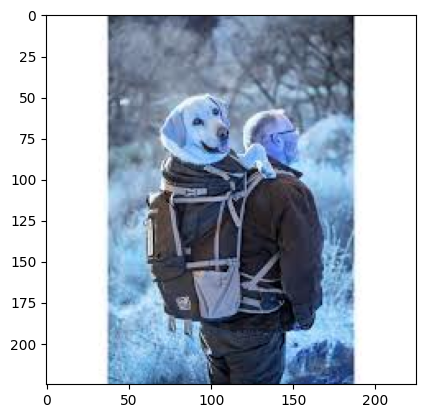

In [5]:
plt.imshow(img1)

In [6]:
# to fix the RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

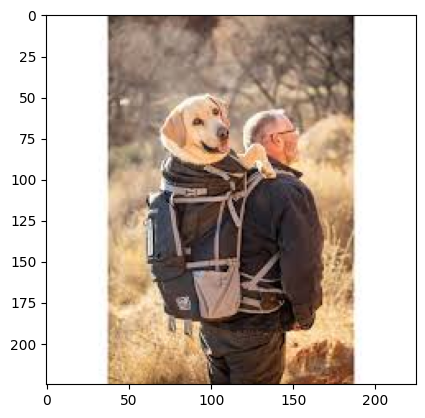

In [7]:
plt.imshow(img1)

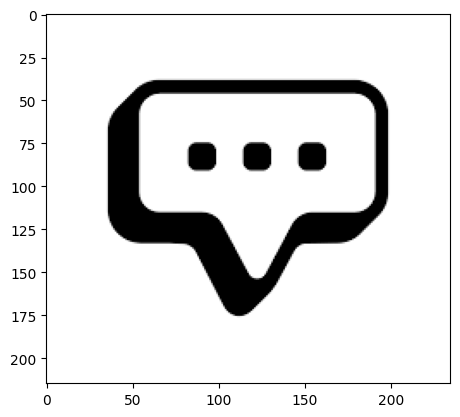

In [8]:
plt.imshow(img2)

In [9]:
# Resizing the images 
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

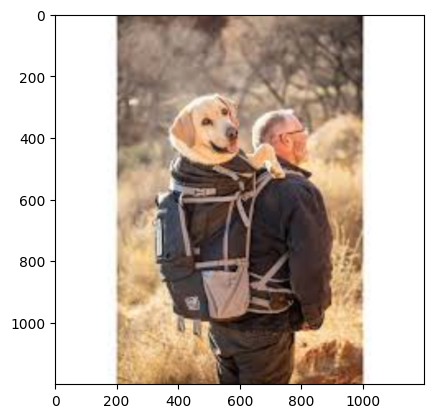

In [10]:
plt.imshow(img1)

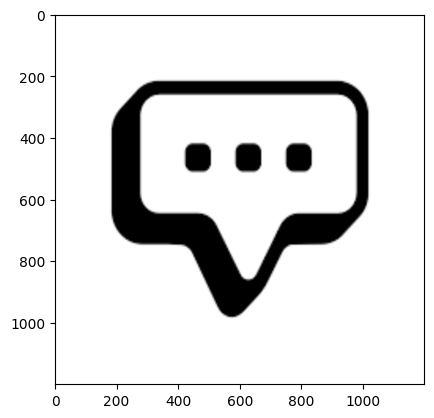

In [11]:
plt.imshow(img2)

Blending the images

In [12]:
# Blending the images
img1.shape, img2.shape

((1200, 1200, 3), (1200, 1200, 3))

In [13]:
blended = cv2.addWeighted(src1=img1, alpha=0.7, src2=img2, beta=0.3, gamma=0)

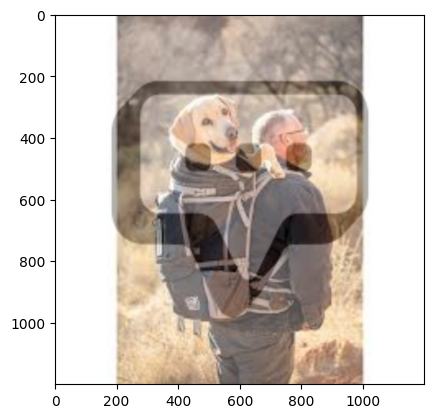

In [14]:
# this is the mix images 
plt.imshow(blended)

Overlaping images of Different sizes

In [15]:
# Load the images
img1 = cv2.imread('dog_bagpack.jpeg')
img2 = cv2.imread('text_box.png')

# Resize images properly
img1 = cv2.resize(img1, (225, 225))  # Background (Large Image)
img2 = cv2.resize(img2, (225, 225))  # Overlay Image


# Convert color space
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Define placement
x_offset = 0
y_offset = 0

# Place img2 onto img1
img1[y_offset:y_offset+img2.shape[0], x_offset:x_offset+img2.shape[1]] = img2

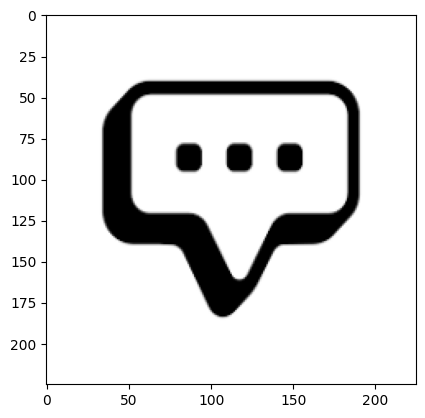

In [16]:
plt.imshow(img1)

Blending images of Different Sizes 

In [17]:
import numpy as np 
import cv2

In [18]:
# Load two images 
img1 = cv2.imread('dog_bagpack.jpeg')
img2 = cv2.imread('text_box.png')
img2 = cv2.resize(img2, (600, 600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2.shape, img1.shape

((600, 600, 3), (225, 225, 3))

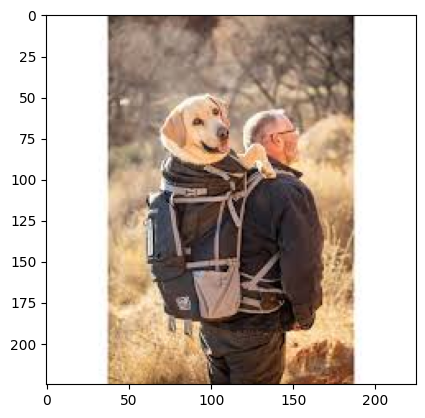

In [19]:
plt.imshow(img1)

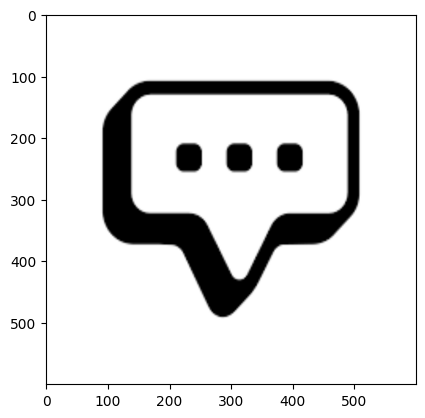

In [20]:
plt.imshow(img2)

Create a Region of Intrest (ROI)

In [21]:
img1 = cv2.resize(img1, (1401, 934))
img1.shape

(934, 1401, 3)

In [22]:
x_offset = 934 - 600 
y_offset = 1401 - 600

In [23]:
# Creating an ROI of the same size of the foreground image (smaller image that will go on top )
rows, cols, channels = img2.shape
# roi = img1[0:rows , 0:cols] # Top Left corner 
roi = img1[y_offset:1401, x_offset:943] # BOTTOM RIGHT CORNER 

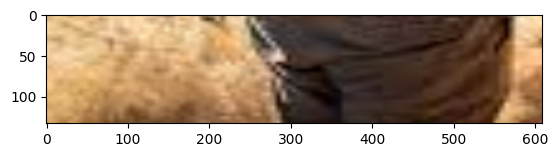

In [24]:
plt.imshow(roi)

In [25]:
roi.shape

(133, 609, 3)

Create a Mask 

In [26]:
# Now create a mask of logo and create its inverse mask also 
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [27]:
img2gray.shape

(600, 600, 3)

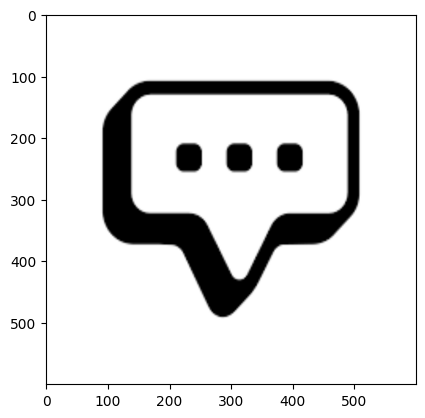

In [28]:
plt.imshow(img2gray, cmap='gray')

In [29]:
mask_inv = cv2.bitwise_not(img2gray)

In [30]:
mask_inv.shape

(600, 600, 3)

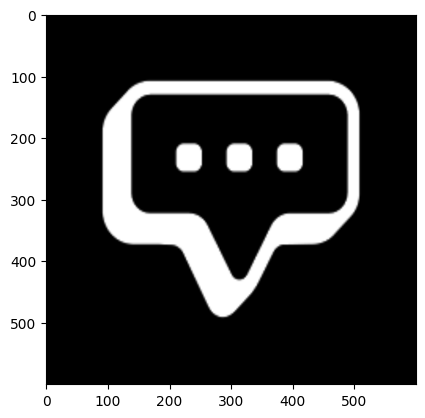

In [31]:
plt.imshow(mask_inv, cmap='gray')

Convert Mask to have 3 channel

In [32]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [33]:
mask_inv = cv2.cvtColor(mask_inv, cv2.COLOR_BGR2GRAY)  # Convert to single channel
bk = cv2.bitwise_or(white_background, white_background, mask = mask_inv)

In [34]:
bk.shape 

(600, 600, 3)

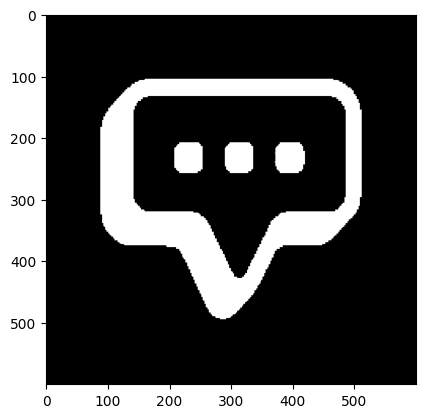

In [35]:
plt.imshow(bk)

Grab Original FG image and place on top of Mask 

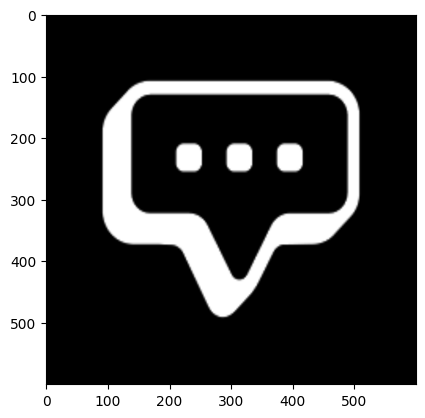

In [36]:
plt.imshow(mask_inv, cmap='gray')

In [37]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

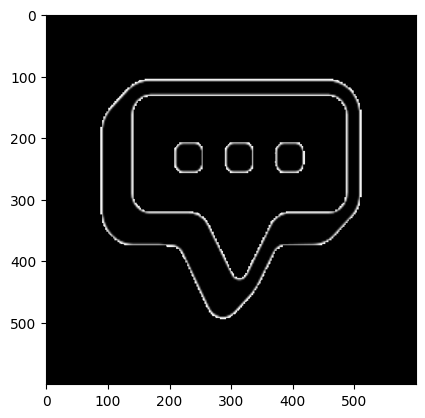

In [38]:
plt.imshow(fg)

In [39]:
fg.shape

(600, 600, 3)

Get ROI and blend in the mask with the ROI

In [42]:
print(f"ROI shape: {roi.shape}, FG shape: {fg.shape}")

ROI shape: (133, 609, 3), FG shape: (600, 600, 3)


In [43]:
fg = cv2.resize(fg, (roi.shape[1], roi.shape[0]))  # Resize FG to match ROI


In [44]:
final_roi = cv2.bitwise_or(roi, fg)

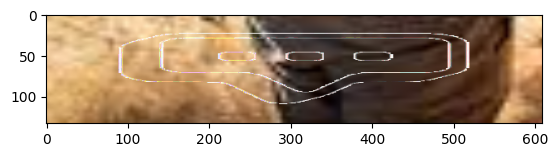

In [45]:
plt.imshow(final_roi)

Now add in the rest of the image

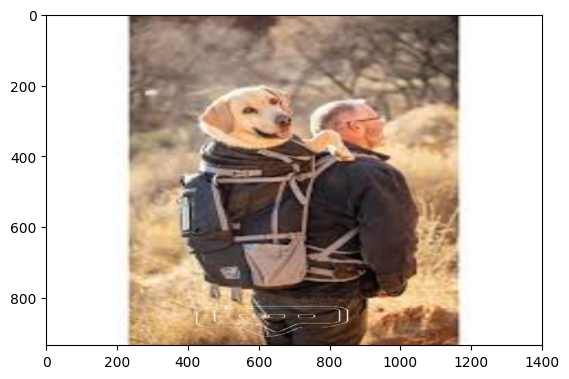

In [49]:
large_img = img1
small_img = final_roi

large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)